In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pandas as pd

# File path to your Excel file
file_path = r"C:\Users\mohammed ansar ur ra\Coal_Production\data\raw\Project_Data.xlsx"

# Attempting to read Excel without specifying engine
try:
    shift1 = pd.read_excel(file_path, sheet_name="Shift1")
    shift2 = pd.read_excel(file_path, sheet_name="Shift2")
    shift3 = pd.read_excel(file_path, sheet_name="Shift3")
    print("Data loaded successfully!")
except ImportError as e:
    print("An error occurred. Make sure the necessary libraries are installed.")
    print(e)
except FileNotFoundError:
    print(f"File not found at the path: {file_path}")


Data loaded successfully!


In [4]:
shift1.shape,shift2.shape,shift3.shape

((1096, 8), (1096, 8), (1096, 8))

In [5]:
shift1.head(2)

,Date,Working Hour,Idle Hour,Maintenace Hour,Break down hours,Total Hours,Production,Breakdown_Reason
0,2013-04-01,5.5,1.0,1.5,0.0,8,4400,0
1,2013-04-02,4.0,1.0,2.0,1.0,8,3200,MBD1


In [6]:
shift2.head(2)

,Date,Working Hour,Idle Hour,Maintenace Hour,Break down hours,Total Hours,Production,Breakdown_Reason
0,2013-04-01,5.0,1.0,0,2.0,8,4000,EBD9
1,2013-04-02,4.0,1.0,0,3.0,8,3200,EBD3


In [7]:
shift3.head(2)

,Date,Working Hour,Idle Hour,Maintenace Hour,Break down hours,Total Hours,Production,Breakdown_Reason
0,2013-04-01,6.0,1.0,0,1.0,8,4800,MBD1
1,2013-04-02,4.0,2.0,0,2.0,8,3200,MBD8


In [8]:
shift1['Date'] = pd.to_datetime(shift1['Date'])
shift2['Date'] = pd.to_datetime(shift2['Date'])
shift3['Date'] = pd.to_datetime(shift3['Date'])

shift1['Month'] = shift1['Date'].dt.month_name(locale = 'English')
FY_month = {'April':'A','May':'B','June':'C','July':'D','August':'E','September':'F',
            'October':'G','November':'H','December':'I','January':'J','February':'K','March':'L'}
shift1['Month_num'] = shift1['Month'].replace(FY_month)
cols = ['Month_num','Month']
shift1['Month_new'] = shift1[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

shift2['Month'] = shift2['Date'].dt.month_name(locale = 'English')
FY_month = {'April':'A','May':'B','June':'C','July':'D','August':'E','September':'F',
            'October':'G','November':'H','December':'I','January':'J','February':'K','March':'L'}
shift2['Month_num'] = shift2['Month'].replace(FY_month)
cols = ['Month_num','Month']
shift2['Month_new'] = shift2[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

shift3['Month'] = shift3['Date'].dt.month_name(locale = 'English')
FY_month = {'April':'A','May':'B','June':'C','July':'D','August':'E','September':'F',
            'October':'G','November':'H','December':'I','January':'J','February':'K','March':'L'}
shift3['Month_num'] = shift3['Month'].replace(FY_month)
cols = ['Month_num','Month']
shift3['Month_new'] = shift3[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

In [9]:
shift1['Financial_Year'] = np.where((shift1['Date'] >= '2013-04-01') & (shift1['Date'] <= '2014-03-31'),'2013_2014',
         np.where((shift1['Date'] >= '2014-04-01') & (shift1['Date'] <= '2015-03-31'),'2014_2015',
         np.where((shift1['Date'] >= '2014-04-01') & (shift1['Date'] <= '2015-03-31'),'2014_2015',
        np.where((shift1['Date'] >= '2015-04-01') & (shift1['Date'] <= '2016-03-31'),'2015_2016','Blank'))))

shift2['Financial_Year'] = np.where((shift2['Date'] >= '2013-04-01') & (shift2['Date'] <= '2014-03-31'),'2013_2014',
         np.where((shift2['Date'] >= '2014-04-01') & (shift2['Date'] <= '2015-03-31'),'2014_2015',
         np.where((shift2['Date'] >= '2014-04-01') & (shift2['Date'] <= '2015-03-31'),'2014_2015',
        np.where((shift2['Date'] >= '2015-04-01') & (shift2['Date'] <= '2016-03-31'),'2015_2016','Blank'))))

shift3['Financial_Year'] = np.where((shift3['Date'] >= '2013-04-01') & (shift3['Date'] <= '2014-03-31'),'2013_2014',
         np.where((shift3['Date'] >= '2014-04-01') & (shift3['Date'] <= '2015-03-31'),'2014_2015',
         np.where((shift3['Date'] >= '2014-04-01') & (shift3['Date'] <= '2015-03-31'),'2014_2015',
        np.where((shift3['Date'] >= '2015-04-01') & (shift3['Date'] <= '2016-03-31'),'2015_2016','Blank'))))

# Primary Explorations

## Shift Wise Analysis

Machine Maintanence is always done in the mornings of a working day. So for shifts 2 & 3, this column (Maintenance Hour) will always be Zero.

In [11]:
# Group by 'Financial_Year', summing only numeric columns
result = (
    shift1.groupby("Financial_Year")
    .sum(numeric_only=True)  # Only include numeric columns in the summation
    .reset_index()
)

# Apply the style background gradient
styled_result = result.style.background_gradient(cmap='Greens')

# Display the styled dataframe (only works in Jupyter Notebook or IPython environments)
styled_result


,Financial_Year,Working Hour,Idle Hour,Maintenace Hour,Break down hours,Total Hours,Production
0,2013_2014,1590.500000,387.500000,610.500000,331.500000,2920,1272400
1,2014_2015,1609.000000,374.000000,609.500000,327.500000,2920,1287200
2,2015_2016,1617.000000,372.500000,615.000000,323.500000,2928,1293600


In [12]:
# Group by 'Financial_Year' and sum only numeric columns
result_shift2 = (
    shift2.groupby("Financial_Year")
    .sum(numeric_only=True)  # Summing only numeric columns
    .reset_index()
)

# Apply a background gradient for styling
styled_result_shift2 = result_shift2.style.background_gradient(cmap='Greens')

# Display the styled result (works in Jupyter Notebook or IPython)
styled_result_shift2


,Financial_Year,Working Hour,Idle Hour,Maintenace Hour,Break down hours,Total Hours,Production
0,2013_2014,1614.000000,370.500000,0,935.500000,2920,1291200
1,2014_2015,1614.500000,365.000000,0,940.500000,2920,1291600
2,2015_2016,1612.000000,366.000000,0,950.000000,2928,1289600


In [13]:
# Group by 'Financial_Year' and sum only numeric columns
result_shift3 = (
    shift3.groupby("Financial_Year")
    .sum(numeric_only=True)  # Summing only numeric columns
    .reset_index()
)

# Apply a background gradient for styling
styled_result_shift3 = result_shift3.style.background_gradient(cmap='Greens')

# Display the styled result (works in Jupyter Notebook or IPython)
styled_result_shift3


,Financial_Year,Working Hour,Idle Hour,Maintenace Hour,Break down hours,Total Hours,Production
0,2013_2014,1599.000000,387.500000,0,933.500000,2920,1279200
1,2014_2015,1611.000000,408.500000,0,900.500000,2920,1288800
2,2015_2016,1612.500000,366.000000,0,949.500000,2928,1290000


## Financial Year wise Break Down Reasons (0 represents no break down)

In [14]:
pd.crosstab(shift1['Breakdown_Reason'],shift1['Financial_Year']).style.background_gradient(cmap='Reds')

Financial_Year,2013_2014,2014_2015,2015_2016
Breakdown_Reason,,,
0,176,185,186
EBD1,1,0,0
EBD10,29,34,33
EBD11,7,17,16
EBD13,1,0,0
EBD15,4,0,0
EBD2,1,0,0
EBD3,1,0,0
EBD4,49,54,56


## Shift and Financial year Wise Analysis

In [15]:
pd.pivot_table(shift1,index='Month_new',columns = 'Financial_Year',values = 'Production',aggfunc='sum').style.background_gradient(cmap='Greens')

Financial_Year,2013_2014,2014_2015,2015_2016
Month_new,,,
A_April,99600,107600,109600
B_May,103200,106400,108800
C_June,103200,111600,103200
D_July,107600,110000,115200
E_August,113600,104800,109200
F_September,103200,102400,100800
G_October,108000,112800,105600
H_November,112800,108800,109600
I_December,106400,112000,113200


In [16]:
pd.pivot_table(shift2,index='Month_new',columns = 'Financial_Year',values = 'Production',aggfunc='sum').style.background_gradient(cmap='Greens')

Financial_Year,2013_2014,2014_2015,2015_2016
Month_new,,,
A_April,104800,107600,101200
B_May,115200,104000,110800
C_June,107600,112000,103200
D_July,107600,110000,112000
E_August,106400,106800,107600
F_September,109600,104800,103200
G_October,107200,109600,115600
H_November,110000,107200,102400
I_December,106400,111600,112000


In [17]:
pd.pivot_table(shift3,index='Month_new',columns = 'Financial_Year',values = 'Production',aggfunc='sum').style.background_gradient(cmap='Greens')

Financial_Year,2013_2014,2014_2015,2015_2016
Month_new,,,
A_April,107600,107600,101200
B_May,100800,106400,110800
C_June,108000,109600,103200
D_July,112000,110000,112000
E_August,104800,114000,110000
F_September,103200,100400,102400
G_October,110400,107200,115200
H_November,109600,101600,102000
I_December,106400,114000,113200


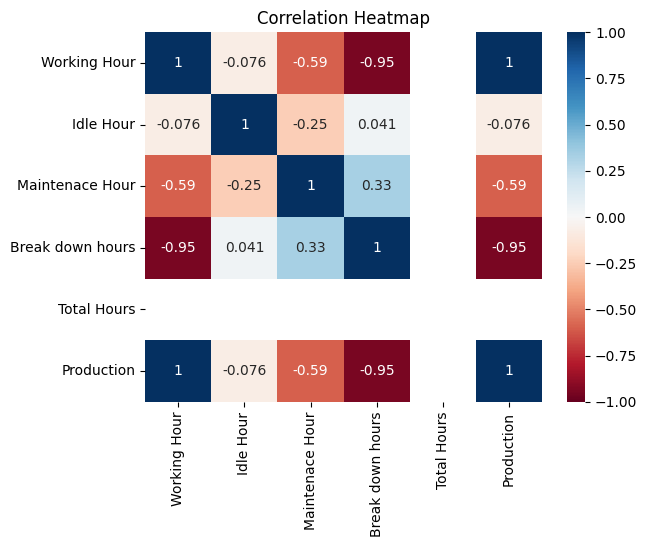

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming shift1 is already loaded
numeric_shift1 = shift1.select_dtypes(include=[float, int])
corr = numeric_shift1.corr()

sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True)
plt.title("Correlation Heatmap")
plt.show()


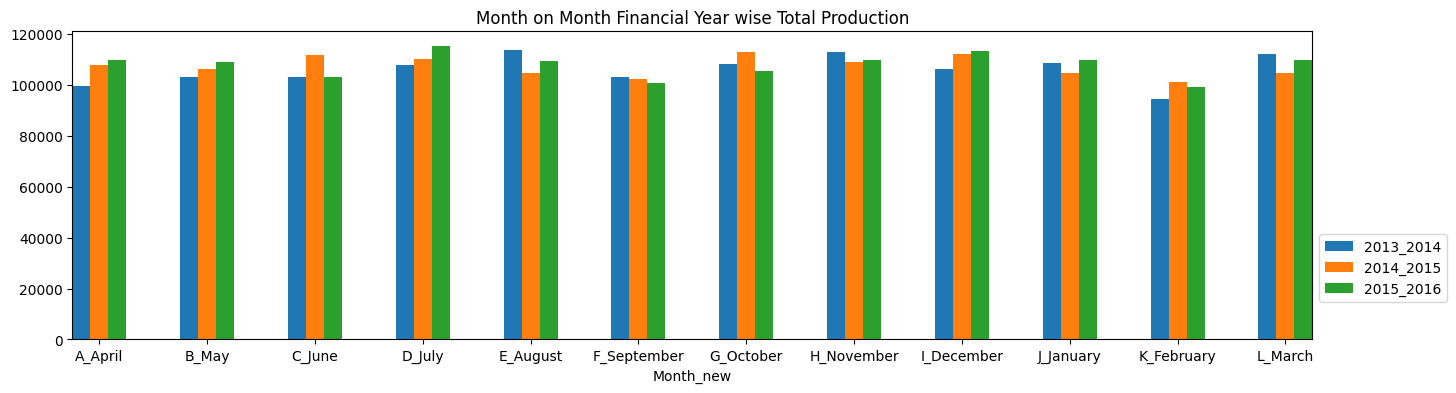

In [22]:
ax = pd.pivot_table(shift1,index='Month_new',columns = 'Financial_Year',values='Production',aggfunc='sum').plot(kind="bar", rot=0,figsize=(16,4),title='Month on Month Financial Year wise Total Production');
ax.autoscale(axis='x',tight=True)
ax.legend(loc=3, bbox_to_anchor=(1.0,0.1));

## Day Wise Analysis

In [23]:
shift1['Shift'] = 'Shift1'
shift2['Shift'] = 'Shift2'
shift3['Shift'] = 'Shift3'

data1 = pd.concat([shift1,shift2,shift3])
data1['Date'] = pd.to_datetime(data1['Date'])

In [24]:
total = pd.pivot_table(data1,index='Date',values = ['Working Hour', 'Idle Hour', 'Maintenace Hour','Break down hours', 'Total Hours', 'Production'],aggfunc='sum').reset_index()
total['Date'] = pd.to_datetime(total['Date'])

total['Financial_Year'] = np.where((total['Date'] >= '2013-04-01') & (total['Date'] <= '2014-03-31'),'2013_2014',
         np.where((total['Date'] >= '2014-04-01') & (total['Date'] <= '2015-03-31'),'2014_2015',
         np.where((total['Date'] >= '2014-04-01') & (total['Date'] <= '2015-03-31'),'2014_2015',
        np.where((total['Date'] >= '2015-04-01') & (total['Date'] <= '2016-03-31'),'2015_2016','Blank'))))
total.index = total['Date']
total = total.drop(columns = 'Date')

## Time Series Decomposition

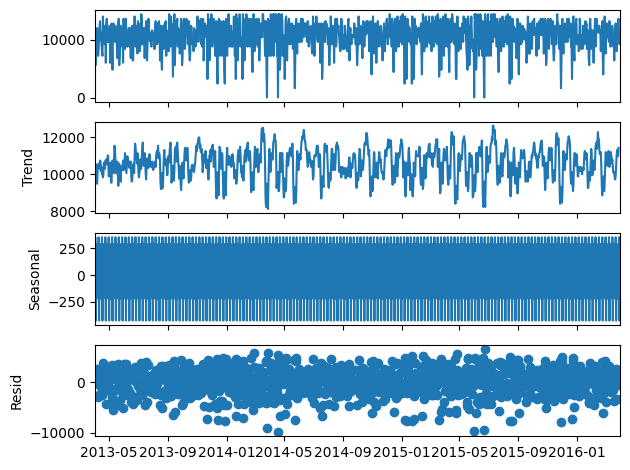

In [26]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

prod = pd.DataFrame(total['Production'])
decomposition = sm.tsa.seasonal_decompose(prod, model='additive')
fig = decomposition.plot()
plt.rcParams['figure.figsize'] = [9.0, 5.0]
plt.show()


## Financial Year wise Production Trend

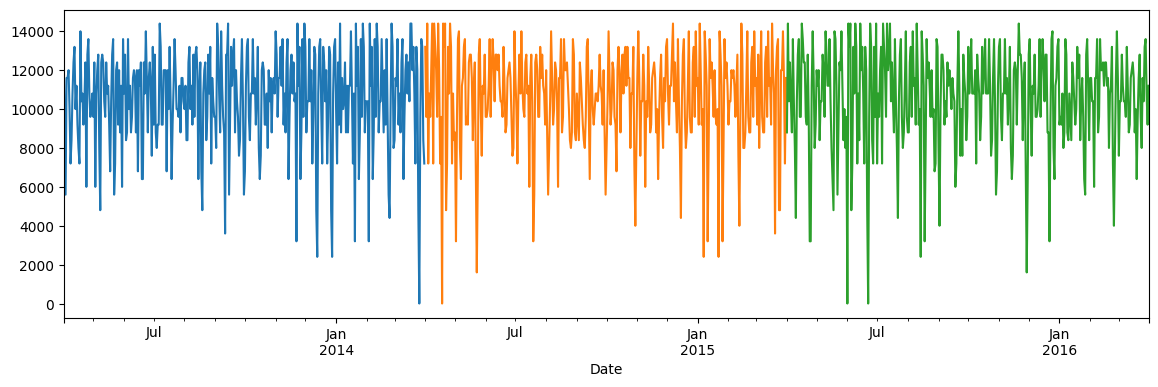

In [27]:
total[total['Financial_Year'] == '2013_2014']['Production'].plot(figsize=(14,4)).autoscale(axis='x',tight=True);
total[total['Financial_Year'] == '2014_2015']['Production'].plot(figsize=(14,4)).autoscale(axis='x',tight=True);
total[total['Financial_Year'] == '2015_2016']['Production'].plot(figsize=(14,4)).autoscale(axis='x',tight=True);

## Zero Production

In [28]:
total[total['Production'] == 0].reset_index(drop=True)

,Break down hours,Idle Hour,Maintenace Hour,Production,Total Hours,Working Hour,Financial_Year
0,19.0,3.0,2.0,0,24,0.0,2013_2014
1,19.0,3.0,2.0,0,24,0.0,2014_2015
2,19.0,3.0,2.0,0,24,0.0,2015_2016
3,19.0,3.0,2.0,0,24,0.0,2015_2016


In [32]:
# Strip any unwanted spaces from column names
total.columns = total.columns.str.strip()
data1.columns = data1.columns.str.strip()

# Check if both DataFrames have the 'Date' column
if 'Date' in total.columns and 'Date' in data1.columns:
    print("Both DataFrames have 'Date' column.")
    
    # Proceed with the merge
    zero_production = pd.merge(
        total[total['Production'] == 0].reset_index(drop=True),
        data1[['Date', 'Breakdown_Reason']].drop_duplicates(),
        on='Date', how='left'
    ).drop_duplicates()

    # Create the pivot table
    pivot_table = pd.pivot_table(
        zero_production[['Date', 'Breakdown_Reason', 'Production']],
        index='Date', 
        columns='Breakdown_Reason',
        aggfunc=lambda x: len(x.unique())
    )

    print(pivot_table)
else:
    print("Ensure both DataFrames have a 'Date' column.")


Ensure both DataFrames have a 'Date' column.


# Secondary Explorations

In [33]:
dod_prod = pd.pivot_table(data1,index='Date',values='Production',aggfunc='sum').reset_index()
dod_prod['Date'] = pd.to_datetime(dod_prod['Date'])
dod_prod['Financial_Year'] = np.where((dod_prod['Date'] >= '2013-04-01') & (dod_prod['Date'] <= '2014-03-31'),'2013_2014',
         np.where((dod_prod['Date'] >= '2014-04-01') & (dod_prod['Date'] <= '2015-03-31'),'2014_2015',
         np.where((dod_prod['Date'] >= '2014-04-01') & (dod_prod['Date'] <= '2015-03-31'),'2014_2015',
        np.where((dod_prod['Date'] >= '2015-04-01') & (dod_prod['Date'] <= '2016-03-31'),'2015_2016','Blank'))))

dod_prod['Month'] = dod_prod['Date'].dt.month_name(locale = 'English')
FY_month = {'April':'A','May':'B','June':'C','July':'D','August':'E','September':'F',
            'October':'G','November':'H','December':'I','January':'J','February':'K','March':'L'}
dod_prod['Month_num'] = dod_prod['Month'].replace(FY_month)
cols = ['Month_num','Month']
dod_prod['Month_new'] = dod_prod[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

In [34]:
dod_prod.head()

,Date,Production,Financial_Year,Month,Month_num,Month_new
0,2013-04-01,13200,2013_2014,April,A,A_April
1,2013-04-02,9600,2013_2014,April,A,A_April
2,2013-04-03,5600,2013_2014,April,A,A_April
3,2013-04-04,11600,2013_2014,April,A,A_April
4,2013-04-05,11600,2013_2014,April,A,A_April


## Month on Month Production Trend across Financial years

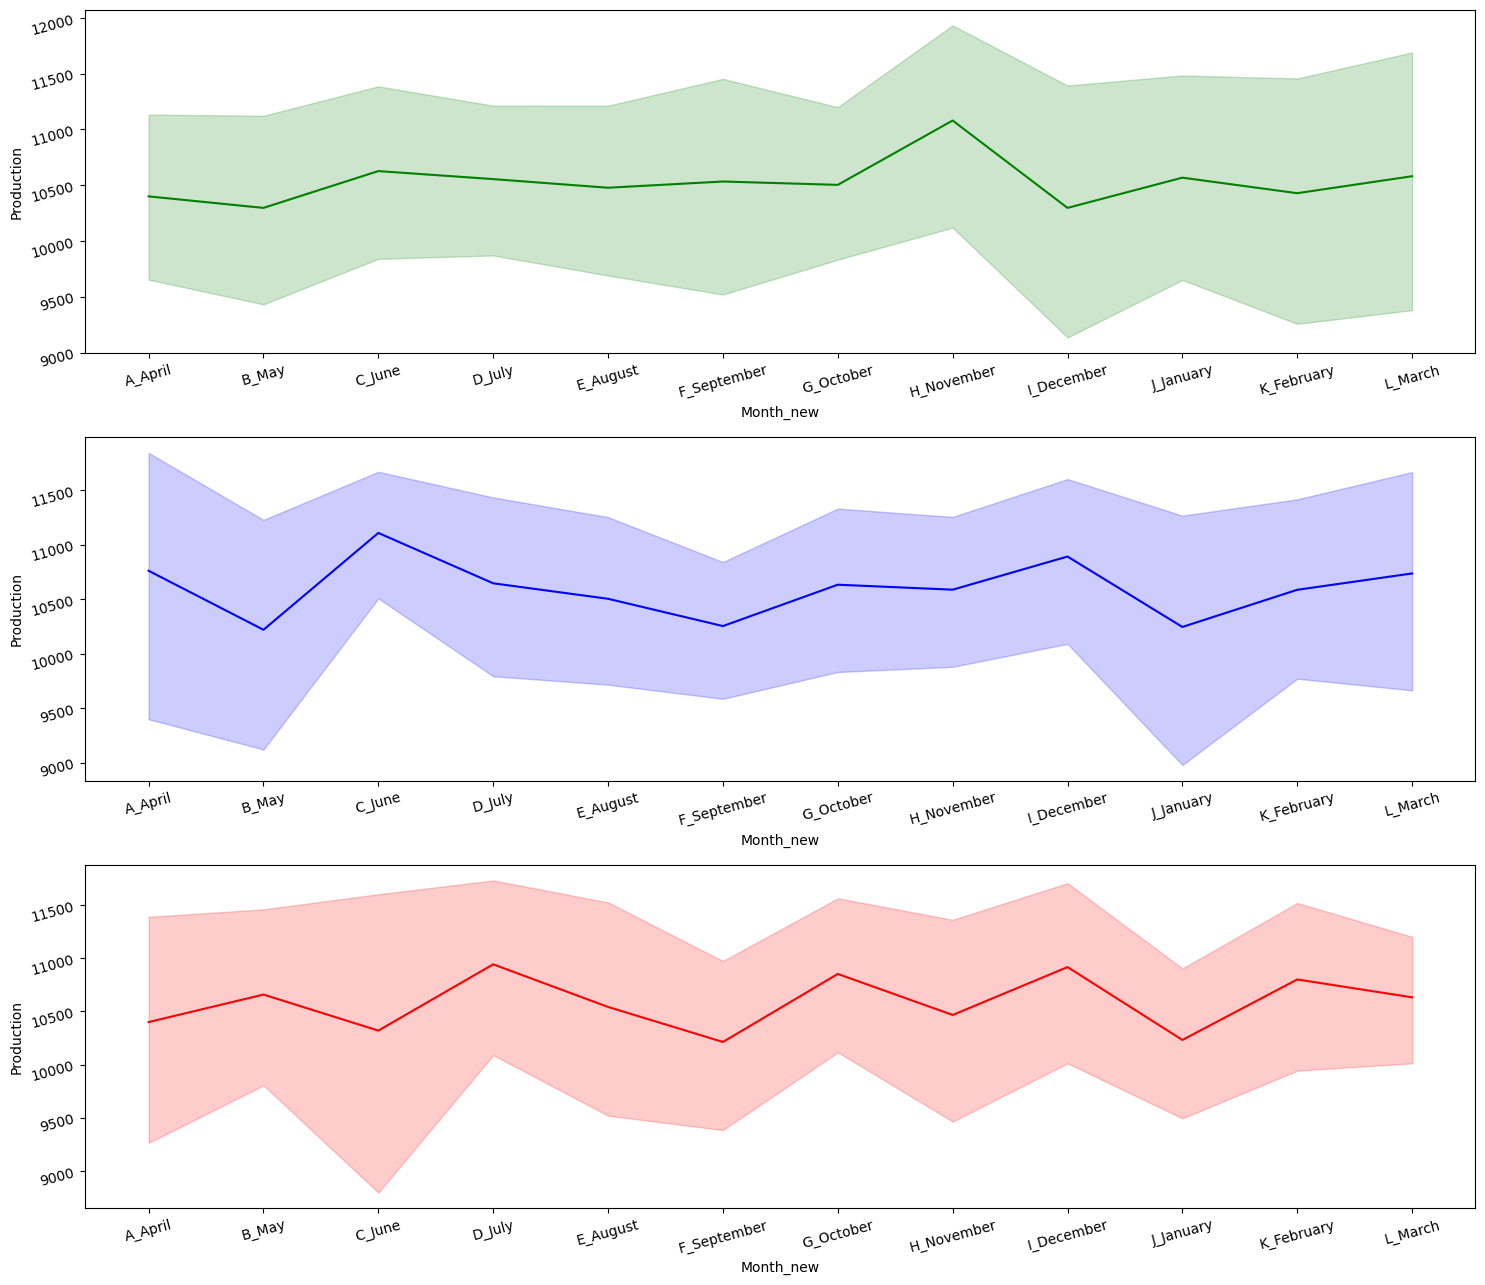

In [35]:
fig, ax = plt.subplots(3,1, figsize=(15,13))

sns.lineplot(x="Month_new", y="Production",
             color='g', data=dod_prod[dod_prod['Financial_Year'] == '2013_2014'],
             ax=ax[0])

ax[0].tick_params(labelrotation=15)

sns.lineplot(x="Month_new", y="Production",
             color='b', data=dod_prod[dod_prod['Financial_Year'] == '2014_2015'],
             ax=ax[1])

ax[1].tick_params(labelrotation=15)

sns.lineplot(x="Month_new", y="Production",
             color='r', data=dod_prod[dod_prod['Financial_Year'] == '2015_2016'],
             ax=ax[2])

ax[2].tick_params(labelrotation=15)

fig.tight_layout(pad=1.25)

plt.show()

In [36]:
dod_prod['Quarter'] = np.where(dod_prod['Month'].isin(['April','May','June']),1,
                      np.where(dod_prod['Month'].isin(['July','August','September']),2,
                      np.where(dod_prod['Month'].isin(['October','November','December']),3,
                      np.where(dod_prod['Month'].isin(['January','February','March']),4,'Blank'))))

## Quarterly Production Trend across Financial year

C:\Users\mohammed ansar ur ra\AppData\Local\Temp\ipykernel_3008\3177276839.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x = 'Quarter', y = 'Production', hue = 'Financial_Year', data = dod_prod,
C:\Users\mohammed ansar ur ra\AppData\Local\Temp\ipykernel_3008\3177276839.py:1: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': 'gray'}` instead.

  sns.barplot(x = 'Quarter', y = 'Production', hue = 'Financial_Year', data = dod_prod,
C:\Users\mohammed ansar ur ra\AppData\Local\Temp\ipykernel_3008\3177276839.py:1: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 2}` instead.

  sns.barplot(x = 'Quarter', y = 'Production', hue = 'Financial_Year', data = dod_prod,


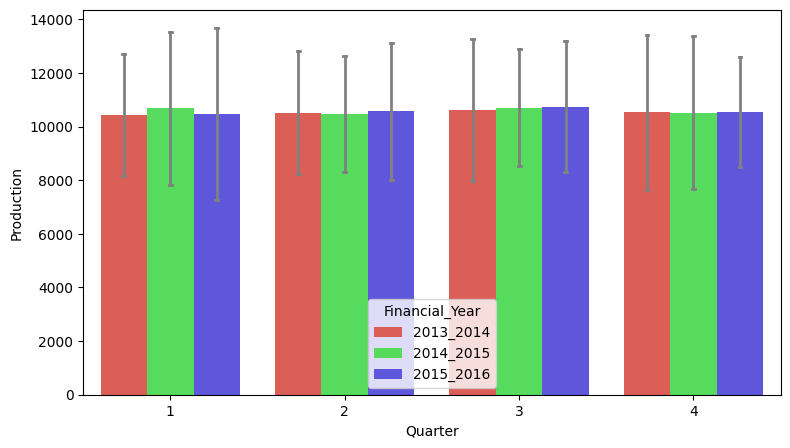

In [37]:
sns.barplot(x = 'Quarter', y = 'Production', hue = 'Financial_Year', data = dod_prod,
            palette = 'hls',order = ['1','2','3','4'],capsize = 0.05,saturation = 8,errcolor = 'gray', errwidth = 2,ci = 'sd');

Next Steps:

Frame various hypothesis to finalize the insights from the explorations.
Look for available time series techniques which are suitable for our business problem.
Use packages like statsmodels,sklearn,..... to build the initial model based on the insights from the hypothesis.,.......